In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


# Importing all the required libraries
1. numpy (np): Numerical computations library.
2. pandas (pd): Data manipulation and analysis library.
3. re: Module for regular expressions and string manipulation.
4. pickle: Serialization and deserialization of Python objects.
5. seaborn (sns): Statistical data visualization library.
6. WordCloud: Word cloud generation from text data.
7. matplotlib.pyplot (plt): Plotting library for visualizations.
8. nltk.corpus.stopwords: Collection of common stopwords.
9. nltk.stem.porter.PorterStemmer: Word stemming using Porter algorithm.
10. TfidfVectorizer: Convert raw text to TF-IDF feature matrix.
11. train_test_split: Split data into training and testing sets.
12. LogisticRegression: Logistic regression classification model.
13. accuracy_score: Compute classification accuracy.

In [ ]:
import numpy as np
import pandas as pd

import re
import pickle

import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Importing nltk Library: Imports the Natural Language Toolkit (nltk) library for natural language processing tasks.
Downloading Stopwords Dataset: Downloads the stopwords dataset from nltk, which contains common words that are typically removed from text data during preprocessing for tasks like sentiment analysis.

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Stopwords
Printing Stopwords: Outputs a list of common English stopwords from the NLTK stopwords dataset.

In [5]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Reading the dataset
Reading CSV File: Reads a CSV file into a pandas DataFrame.

In [6]:
df = pd.read_csv(r'/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1')

# Getting shape of the dataset
DataFrame Shape: Returns the dimensions (number of rows and columns) of the DataFrame.

In [7]:
df.shape

(1599999, 6)

Displaying DataFrame Head: Shows the first few rows of the DataFrame.

In [8]:
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


Defining Column Names: Specifies custom column names for the DataFrame.
Reading CSV File: Reads a CSV file into a pandas DataFrame using custom column names.

In [9]:
col_names = ['target', 'id', 'date', 'flag', 'user', 'text']
df = pd.read_csv(r'/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', names = col_names, encoding='ISO-8859-1')

In [10]:
df.shape

(1600000, 6)

In [11]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Checking for Null Values: Calculates the sum of null values for each column in the DataFrame.

In [12]:
df.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

Dropping Columns: Removes specified columns ('id', 'flag', 'user') from the DataFrame along the specified axis (columns).

In [14]:
df.drop(['id', 'flag', 'user'], axis = 1)

,target,date,text
0,0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...
2,0,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...
3,0,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire
4,0,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all...."
...,...,...,...
1599995,4,Tue Jun 16 08:40:49 PDT 2009,Just woke up. Having no school is the best fee...
1599996,4,Tue Jun 16 08:40:49 PDT 2009,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Tue Jun 16 08:40:49 PDT 2009,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Tue Jun 16 08:40:49 PDT 2009,Happy 38th Birthday to my boo of alll time!!! ...


Counting Target Values: Calculates the frequency of each unique value in the 'target' column of the DataFrame.

In [15]:
df['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

Replacing Values: Replaces the value '4' with '1' in the 'target' column of the DataFrame.

In [16]:
df.replace({'target':{4:1}}, inplace=True)

Counting Target Values: Recalculates the frequency of each unique value in the 'target' column of the DataFrame after replacement.

In [17]:
df['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

Creating New Column: Adds a new column 'sentiment' to the DataFrame, initially copying the values from the 'target' column.
Mapping Labels to Sentiment: Defines a dictionary mapping label values to sentiment categories.
Decoding Labels: Applies a function to decode label values into sentiment categories and assigns the results to the 'sentiment' column.

In [22]:
df['sentiment'] = df['target']
lab_to_sentiment = {0:"Negative", 1:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]

df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
df.head()

,target,id,date,flag,user,text,sentiment
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Negative
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,Negative
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Negative
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,Negative
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",Negative


Dropping Columns: Removes specified columns ('id', 'flag', 'user') from the DataFrame along the specified axis (columns) and updates the DataFrame in place.
Displaying DataFrame Head: Shows the first few rows of the DataFrame after dropping columns.

In [25]:
df.drop(['id', 'flag', 'user'], axis = 1, inplace=True)
df.head()

,target,date,text,sentiment
0,0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Negative
1,0,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...,Negative
2,0,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...,Negative
3,0,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire,Negative
4,0,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all....",Negative


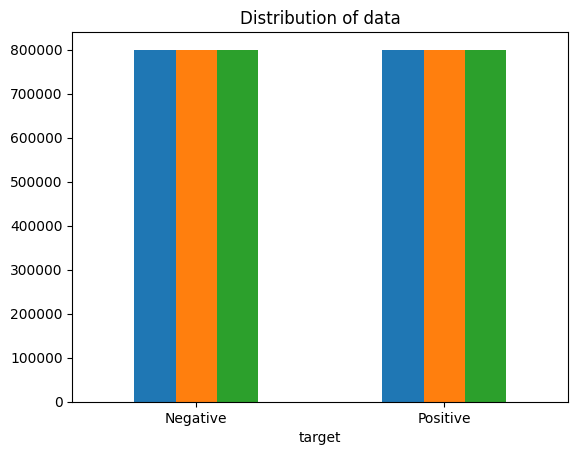

In [26]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

Generating Word Cloud: Creates a word cloud visualization based on the text data where sentiment is positive.

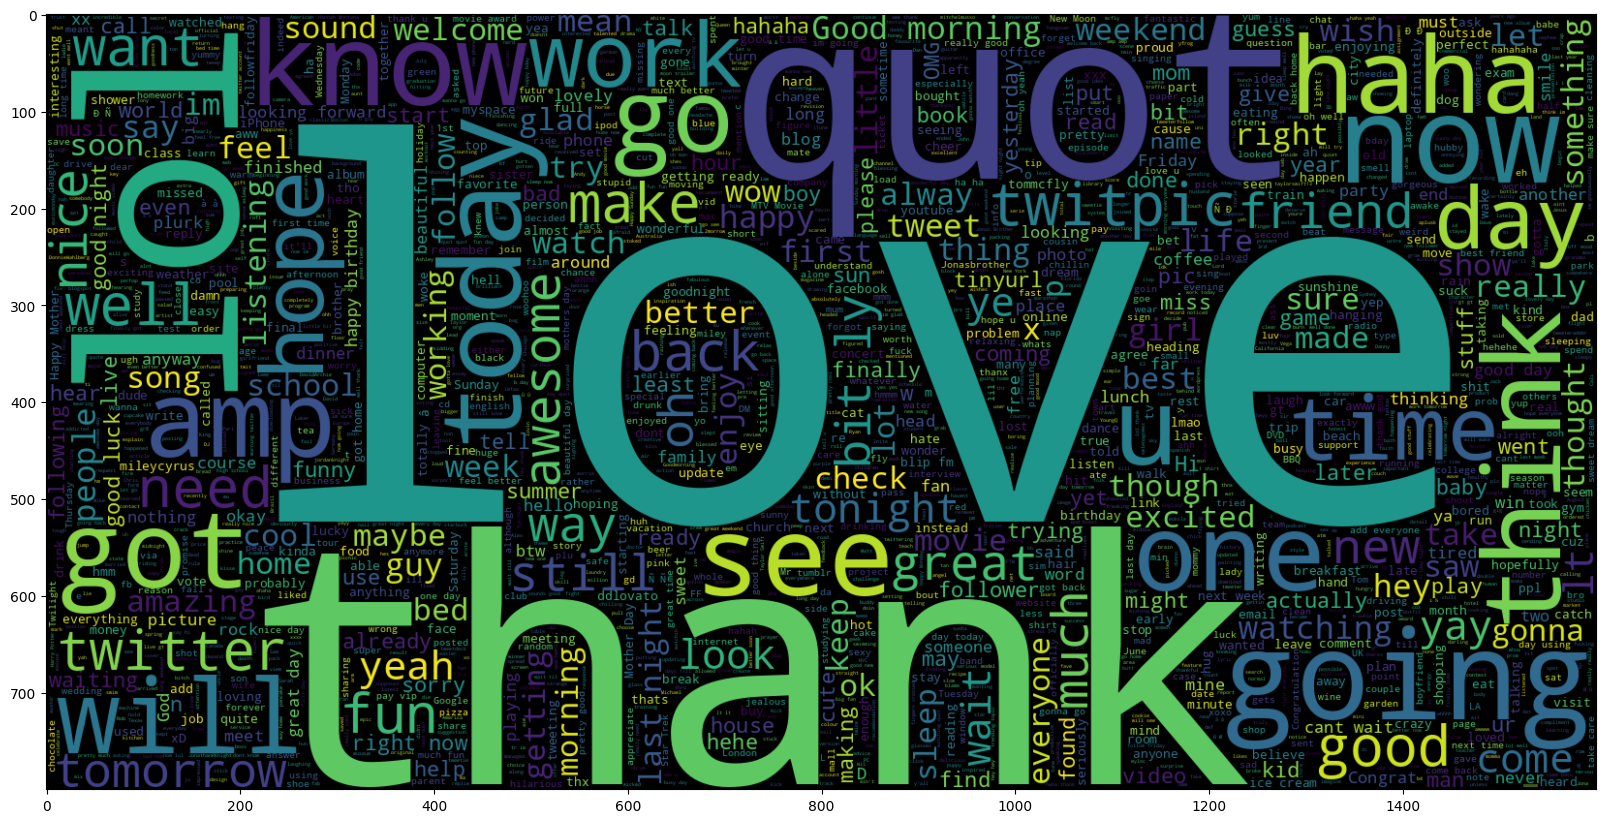

In [33]:
# Positive words
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

Generating Word Cloud: Creates a word cloud visualization based on the text data where sentiment is negative.

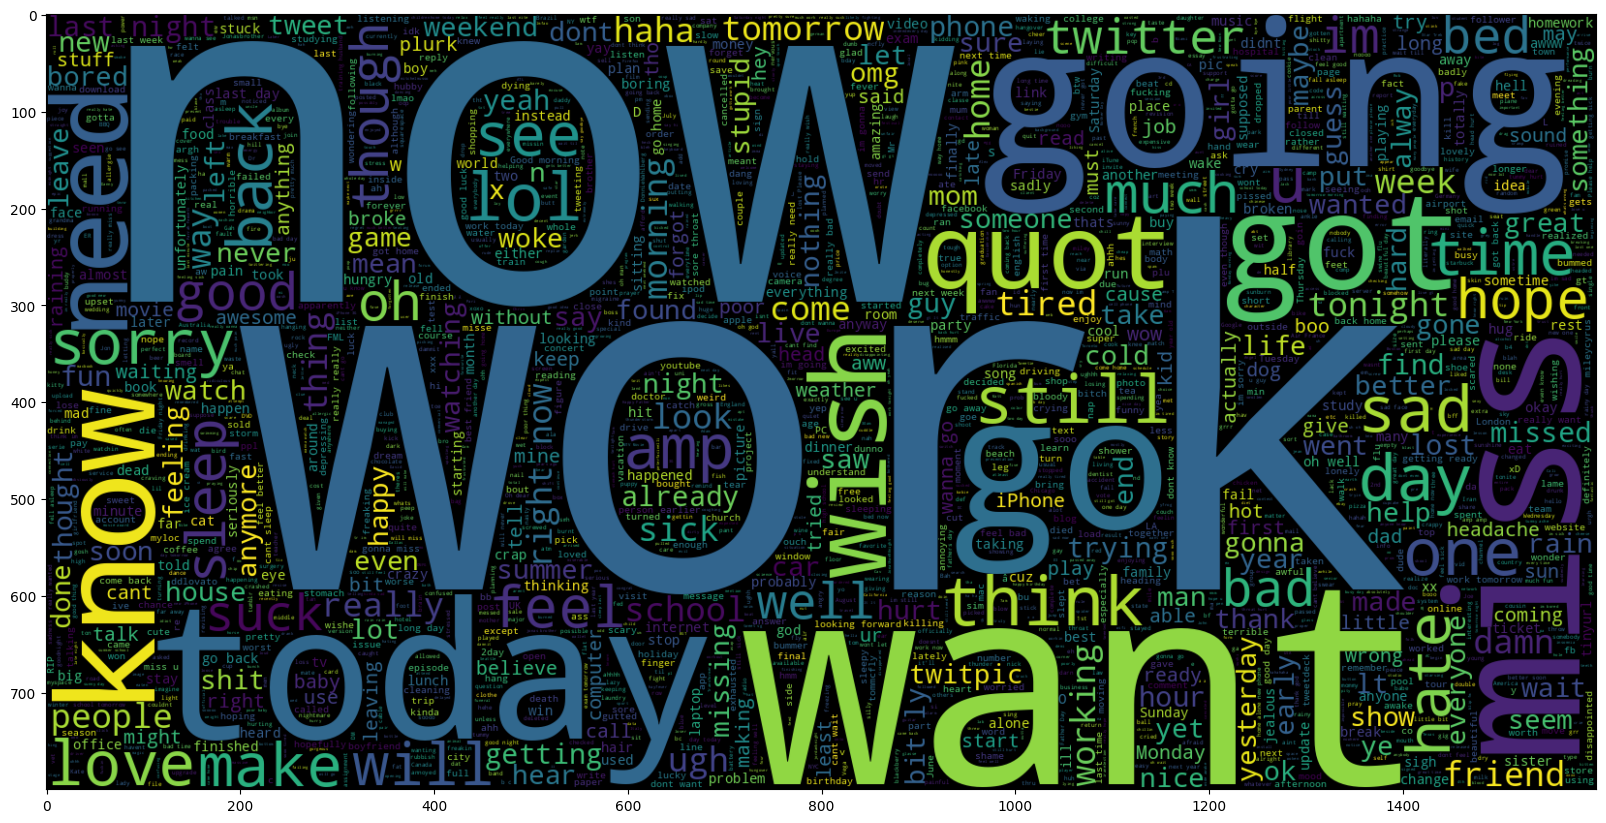

In [34]:
# Negative Words
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

Defining Stemming Function: Defines a function to perform stemming on input text content.

In [27]:
port_stem = PorterStemmer()

def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    
    return stemmed_content

Applying Stemming: Applies the defined stemming function to the 'text' column of the DataFrame and stores the results in a new column called 'stemmed_content'.

In [28]:
df['stemmed_content'] = df['text'].apply(stemming)

Extracting Feature: Extracts the 'stemmed_content' column from the DataFrame and assigns it to variable X as an array of values.

In [29]:
X = df['stemmed_content'].values

Extracting Target: Extracts the 'target' column from the DataFrame and assigns it to variable Y as an array of values.

In [30]:
Y = df['target'].values

Splitting Data: Splits the features (X) and target (Y) data into training and testing sets using train_test_split function.

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

Creating Vectorizer: Initializes a TF-IDF vectorizer.
Transforming Data: Transforms the training and testing text data into TF-IDF feature matrices using the vectorizer.

In [35]:
Vectorizer = TfidfVectorizer()
X_train = Vectorizer.fit_transform(X_train)
X_test = Vectorizer.transform(X_test)

Creating Model: Initializes a logistic regression model with a maximum number of iterations set to 10000.
Training Model: Fits the model to the training data (X_train, Y_train) using the fit method.

In [36]:
model = LogisticRegression(max_iter = 10000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

Making Predictions: Predicts the target values for the training data (X_train) using the trained model.
Calculating Training Accuracy: Computes the accuracy of the model predictions on the training data.
Printing Training Accuracy: Displays the accuracy of the model on the training data.

In [37]:
X_train_prediction = model.predict(X_train)
X_train_accuracy = accuracy_score(Y_train, X_train_prediction)
print(X_train_accuracy)

0.81022421875


Making Predictions: Predicts the target values for the testing data (X_test) using the trained model.
Calculating Testing Accuracy: Computes the accuracy of the model predictions on the testing data.
Printing Testing Accuracy: Displays the accuracy of the model on the testing data.

In [38]:
X_test_prediction = model.predict(X_test)
X_test_accuracy = accuracy_score(Y_test, X_test_prediction)
print(X_test_accuracy)

0.777990625


Saving Model: Serializes the trained model using pickle and saves it to a file named 'trained_twitter_finalmodel.sav'.

In [45]:
import pickle
filename = 'trained_twitter_finalmodel.sav'
pickle.dump(model, open(filename, 'wb'))